In [78]:
using Distributions
using Gadfly
using PerformanceEval

In [287]:
using PureSeq

In [288]:
methods(predict)

# 2 methods for generic function "predict":
predict(model::poissonRegression,x::Array{Float64,2}) at /homes/gws/slund1/.julia/v0.3/PureSeq/src/PoissonRegression.jl:32
predict(model::poissonRegression,x::Array{Float64,1}) at /homes/gws/slund1/.julia/v0.3/PureSeq/src/PoissonRegression.jl:38

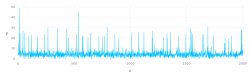

In [275]:
genomeSize = 200000
numPeaks = 1600
noiseLambda = 4
peakLambda = 20
peakInd = sample(1:genomeSize, numPeaks, replace=false)
signal = zeros(genomeSize)
signal[peakInd] = rand(Poisson(peakLambda), numPeaks)
truth = zeros(genomeSize)
truth[peakInd] = 1

background1 = zeros(genomeSize)
background1Ind = sample(1:genomeSize, numPeaks, replace=false)
background1[background1Ind] = rand(Poisson(peakLambda), numPeaks)

background2 = zeros(genomeSize)
background2Ind = sample(1:genomeSize, numPeaks, replace=false)
background2[background2Ind] = rand(Poisson(peakLambda), numPeaks)

background3 = zeros(genomeSize)
background3Ind = sample(1:genomeSize, numPeaks, replace=false)
background3[background3Ind] = rand(Poisson(peakLambda), numPeaks)

background4 = zeros(genomeSize)
background4Ind = sample(1:genomeSize, numPeaks, replace=false)
background4[background4Ind] = rand(Poisson(peakLambda), numPeaks)

targetExp = rand(Poisson(noiseLambda), genomeSize) .+ signal .+ background1 .+ background3
controlExp1 = rand(Poisson(noiseLambda), genomeSize) .+ background1
controlExp2 = rand(Poisson(noiseLambda), genomeSize) .+ background2
controlExp3 = rand(Poisson(noiseLambda), genomeSize) .+ background3
controlExp4 = rand(Poisson(noiseLambda), genomeSize) .+ background4

set_default_plot_size(25cm,8cm)
plot(x=1:2000, y=targetExp[1:2000], Geom.line)

In [276]:
using GLMNet

In [277]:
# X = log([controlExp1 controlExp2 controlExp3] + 2)
# cv = glmnetcv(X, targetExp, GLMNet.Poisson())
# println(cv.path.betas[:,indmin(cv.meanloss)])
# p = GLMNet.predict(cv.path, X)[:,indmin(cv.meanloss)];

In [278]:
X = [controlExp1 controlExp2 controlExp3 controlExp4]
cv = glmnetcv(X, targetExp)
println(cv.path.betas[:,indmin(cv.meanloss)])
p = GLMNet.predict(cv.path, X)[:,indmin(cv.meanloss)];

[0.459299391403576,0.0,0.4499955431315079,-0.0012764069128464335]


In [285]:
function score_peaks(data, control)
    scores = zeros(length(data))
    meanLambda = 0.0#mean(data)/2
    for i in 1:length(data)
        lambda = max(mean(control[max(1,i-4):min(length(control),i+4)]), 0.001)
        #println(lambda, " ", control[max(1,i-4):min(length(control),i+4)])
        scores[i] = ccdf(Poisson(max(meanLambda, lambda)), data[i])
    end
    scores
end
scores = score_peaks(targetExp, p);

AUC: 0.48959623955233483


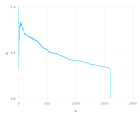

In [286]:
scores = score_peaks(targetExp, p)
xs,ys = precision_recall(vec(sortrows([truth scores], by=x->x[2])[:,1]))
println("AUC: ", auc(xs,ys)/xs[end])
set_default_plot_size(14cm,12cm)
plot(x=xs, y=ys, Geom.line)

AUC: 0.44789946784891477


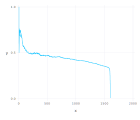

In [281]:
scores = score_peaks(targetExp, controlExp1)
xs,ys = precision_recall(vec(sortrows([truth scores], by=x->x[2])[:,1]))
println("AUC: ", auc(xs,ys)/xs[end])
plot(x=xs, y=ys, Geom.line)

AUC: 0.41893937526319724


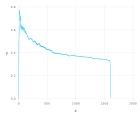

In [282]:
scores = score_peaks(targetExp, (controlExp1 .+ controlExp2 .+ controlExp3 .+ controlExp4)/4)
xs,ys = precision_recall(vec(sortrows([truth scores], by=x->x[2])[:,1]))
println("AUC: ", auc(xs,ys)/xs[end])
plot(x=xs, y=ys, Geom.line)

In [56]:
pdf(Poisson(10), 5)

0.03783327480207072

In [51]:
pdf(Poisson(5), 10)

0.01813278870782186